In [21]:
import numpy as np
import pandas as pd
import glob
import h5py
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc
from pickle import load
import numpy as np
import scipy as scipy
import math

%matplotlib inline

<module 'matplotlib.pyplot' from 'C:\\Users\\Hassan\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

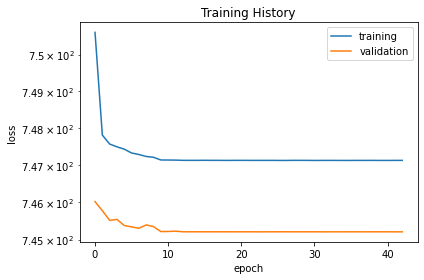

In [22]:
h5f = h5py.File("output.h5", 'r')

def make_plot_training_history(plt, h5f):
    loss = h5f['loss'][:]
    val_loss = h5f['val_loss'][:]

    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Training History')

    plt.semilogy()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.tight_layout()
    return plt

make_plot_training_history(plt, h5f)

In [23]:
inval = np.array(h5f['QCD'])
outval = np.array(h5f['predicted_QCD'])

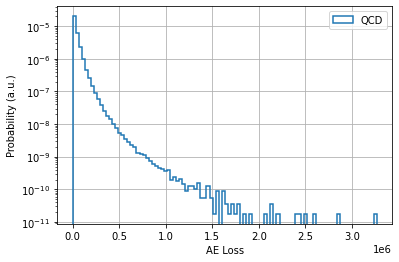

In [24]:
def mse(image_in, image_out):
    mse = (image_out-image_in)*(image_out-image_in)
    # sum over channel
    mse = np.sum(mse,axis=-1)
    # sum over y
    mse = np.sum(mse, axis=-1)
    # sum over x
    mse = np.sum(mse, axis=-1)
    return mse 

lossQCD = mse(inval, outval)
maxScore = np.max(lossQCD)
# plot QCD
plt.figure()
plt.hist(lossQCD, bins=100, label='QCD', density=True, range=(0, maxScore), 
         histtype='step', fill=False, linewidth=1.5)
plt.semilogy()
plt.xlabel("AE Loss")
plt.ylabel("Probability (a.u.)")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()